In [104]:
import os
from zipfile import *
import shutil
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

In [81]:
models = os.listdir('output')
factors = np.array(["Blur", "Condition", "Contrast", "Curved", "FontSize", "FontStyle", "Noise", "Resolution", "Ripple", "Rotated", "SkewLevel"])
df = pd.DataFrame(columns = factors)
print(df)
for model in models:
    path = os.path.join('output/',model,'results.zip')
    source_results = ZipFile(path, 'r')
    target_dir = os.path.join('tmpresults/', model)
    source_results.extractall(target_dir)
    print("getting results for " + model)
    results_filelist = os.listdir(target_dir)
    results_filelist.remove('method.json')
    factor_counts = pd.Series(index=factors, dtype="int8")
    factor_sums = pd.Series(index=factors, dtype="float64").fillna(0)
    for file in results_filelist:
        factor = file.split("_")[0]
        factor_counts[factor] += 1
        file_path = os.path.join(target_dir,file)
        f = open(file_path, 'r')
        result = json.loads(f.read())
        f.close()
        factor_sums[factor] += result["hmean"]
    averages = factor_sums / factor_counts
    averages = averages.rename(model)
    averages = averages.to_frame()
    averages = averages.transpose()
    print(averages)
    df = df.append(averages)
    print(df)


Empty DataFrame
Columns: [Blur, Condition, Contrast, Curved, FontSize, FontStyle, Noise, Resolution, Ripple, Rotated, SkewLevel]
Index: []
getting results for CRAFT
           Blur  Condition  Contrast    Curved  FontSize  FontStyle     Noise  \
CRAFT  0.666051   0.947796  0.958372  0.348582   0.66415   0.698979  0.163663   

       Resolution    Ripple   Rotated  SkewLevel  
CRAFT    0.367569  0.678521  0.390829   0.572749  
           Blur  Condition  Contrast    Curved  FontSize  FontStyle     Noise  \
CRAFT  0.666051   0.947796  0.958372  0.348582   0.66415   0.698979  0.163663   

       Resolution    Ripple   Rotated  SkewLevel  
CRAFT    0.367569  0.678521  0.390829   0.572749  
getting results for Pixel_link
                Blur  Condition  Contrast    Curved  FontSize  FontStyle  \
Pixel_link  0.731726   0.738639   0.87309  0.786369  0.581204   0.910843   

              Noise  Resolution    Ripple   Rotated  SkewLevel  
Pixel_link  0.30319     0.45219  0.736396  0.839769   0.

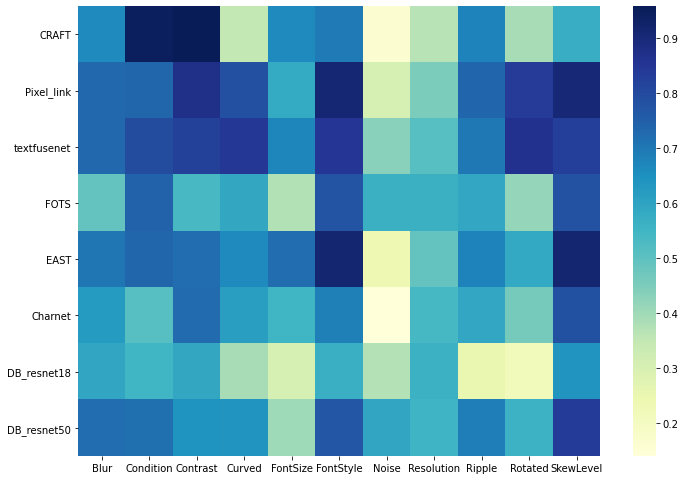

In [109]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
heatmap = sns.heatmap(df, annot=False, cmap="YlGnBu")
heatmap.figure.savefig("heatmap.jpg")